<br>

# Graded Project
### Web Development using Flask
<hr>

## Domain:
- Finance and Banking

## Business Context:
- Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customers first apply for a home loan after that company manually validates the customer eligibility for loan. Company wants to automate the loan eligibility process based on customer detail provided while filling the details online. They need a web application where a user can access their website and register, login, and enter the required details such as Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others for checking the eligibility for the home loan.

## Dataset Description:
Dataset to classify whether a person will get loan or not. This is a classification problem. The dataset contains 13 columns where, the loan_status column is the one we have to predict.

In [1]:
%%html
<style>
table {float:left}
</style>

## Attribute Information:

| SL.No | Attribute | Description |
|:-|:-|:-|
|1. | Loan ID | Unique Loan ID
|2. | Gender | Male or Female
|3. | Married | Applicant married (Y/N)
|4. | Dependents | Number of dependents
|5. | Self employed | Self employed (Y/N)
|6. | Education | Graduate/Undergraduate
|7. | Applicant Income | Applicant income (in dollars)
|8. | Co Applicant Income | Co Applicant Income (in dollars)
|9. | Loan Amount | Loan amount in thousands (in dollars)
|10. | Loan Amount Term | Term of loan in months
|11. | Credit History | Credit history meets guidelines Yes/No
|12. | Property area | Urban/Semi Urban/Rural
|13. | Loan Status (Target) | Loan Approved (Y/N)

## Data Citation:
- Siddharth Sharma, Machine Learning Developer at DBlockchainers, Bengaluru, Karnataka, India. <br>
 https://www.kaggle.com/datasets/ssiddharth408/loan-prediction-dataset

## Project Objective:
- This is a standard supervised classification task. A classification problem where we have to predict whether a customer is eligible for loan or not based on a given set of independent variable(s).
- To build a Python Flask ML application where a user has to get registered by entering the username and password and login to the website and then enter their details to check whether they are eligible for loan or not.

### 1. Import required libraries and read the dataset. (2)

In [2]:
## Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.ensemble import StackingClassifier
# from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

In [3]:
## Loading the dataset
df = pd.read_csv(r'loan_approval_data.csv')

### 2. Check the first few samples, shape, info of the data, and familiarize yourself with different features. (2)

In [4]:
## 5 random samples
df.sample(5)

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
49,lp001151,female,no,0.0,graduate,no,4000,2275.0,144.0,360.0,1.0,semiurban,y
81,lp001266,male,yes,1.0,graduate,yes,2395,0.0,NaN,360.0,1.0,semiurban,y
144,lp001508,male,yes,2.0,graduate,no,11757,0.0,187.0,180.0,1.0,urban,y
399,lp002287,female,no,0.0,graduate,no,1500,1800.0,103.0,360.0,0.0,semiurban,n
444,lp002424,male,yes,0.0,graduate,no,7333,8333.0,175.0,300.0,NaN,rural,y


In [5]:
## Shape of the data
df.shape

(614, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    float64
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


### 3. Check for missing values in the dataset. If present, handle them with appropriate methods, and drop redundant features. (2)

In [7]:
## Checking for missing values
(df.isnull().sum() / len(df)) * 100

loan_id              0.000000
gender               2.117264
married              0.488599
dependents           2.442997
education            0.000000
self_employed        5.211726
applicantincome      0.000000
coapplicantincome    0.000000
loanamount           3.583062
loan_amount_term     2.280130
credit_history       8.143322
property_area        0.000000
loan_status          0.000000
dtype: float64

In [8]:
## Imputing missing data
missing = df.isnull().sum()/len(df)

## Getting indexes with missing values
index = [i  for i in missing[missing>0].index]


## Filling null values of numeric columns with their median values
num_col = [i     
           for i in index      
           if i in df.columns and  df[i].dtype!=object]

for col in num_col:
    df[col]=df[col].fillna(df[col].median())

    
## Filling null values of non-numeric columns with their mode values
cat_col = [i     
           for i in index      
           if i in df.columns and  df[i].dtype==object]

for col in cat_col:
    df[col]=df[col].fillna(df[col].mode()[0])
    

## Re-checking missing values
df.isnull().sum()

loan_id              0
gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

In [9]:
df.columns

Index(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

In [10]:
## Dropping redundant columns
df.drop('loan_id', axis=1, inplace=True)
df.head(5)

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,male,no,0.0,graduate,no,5849,0.0,128.0,360.0,1.0,urban,y
1,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


### 4. Visualize the distribution of the target column 'loan_status' with respect to various categorical features and write your observations. (2)

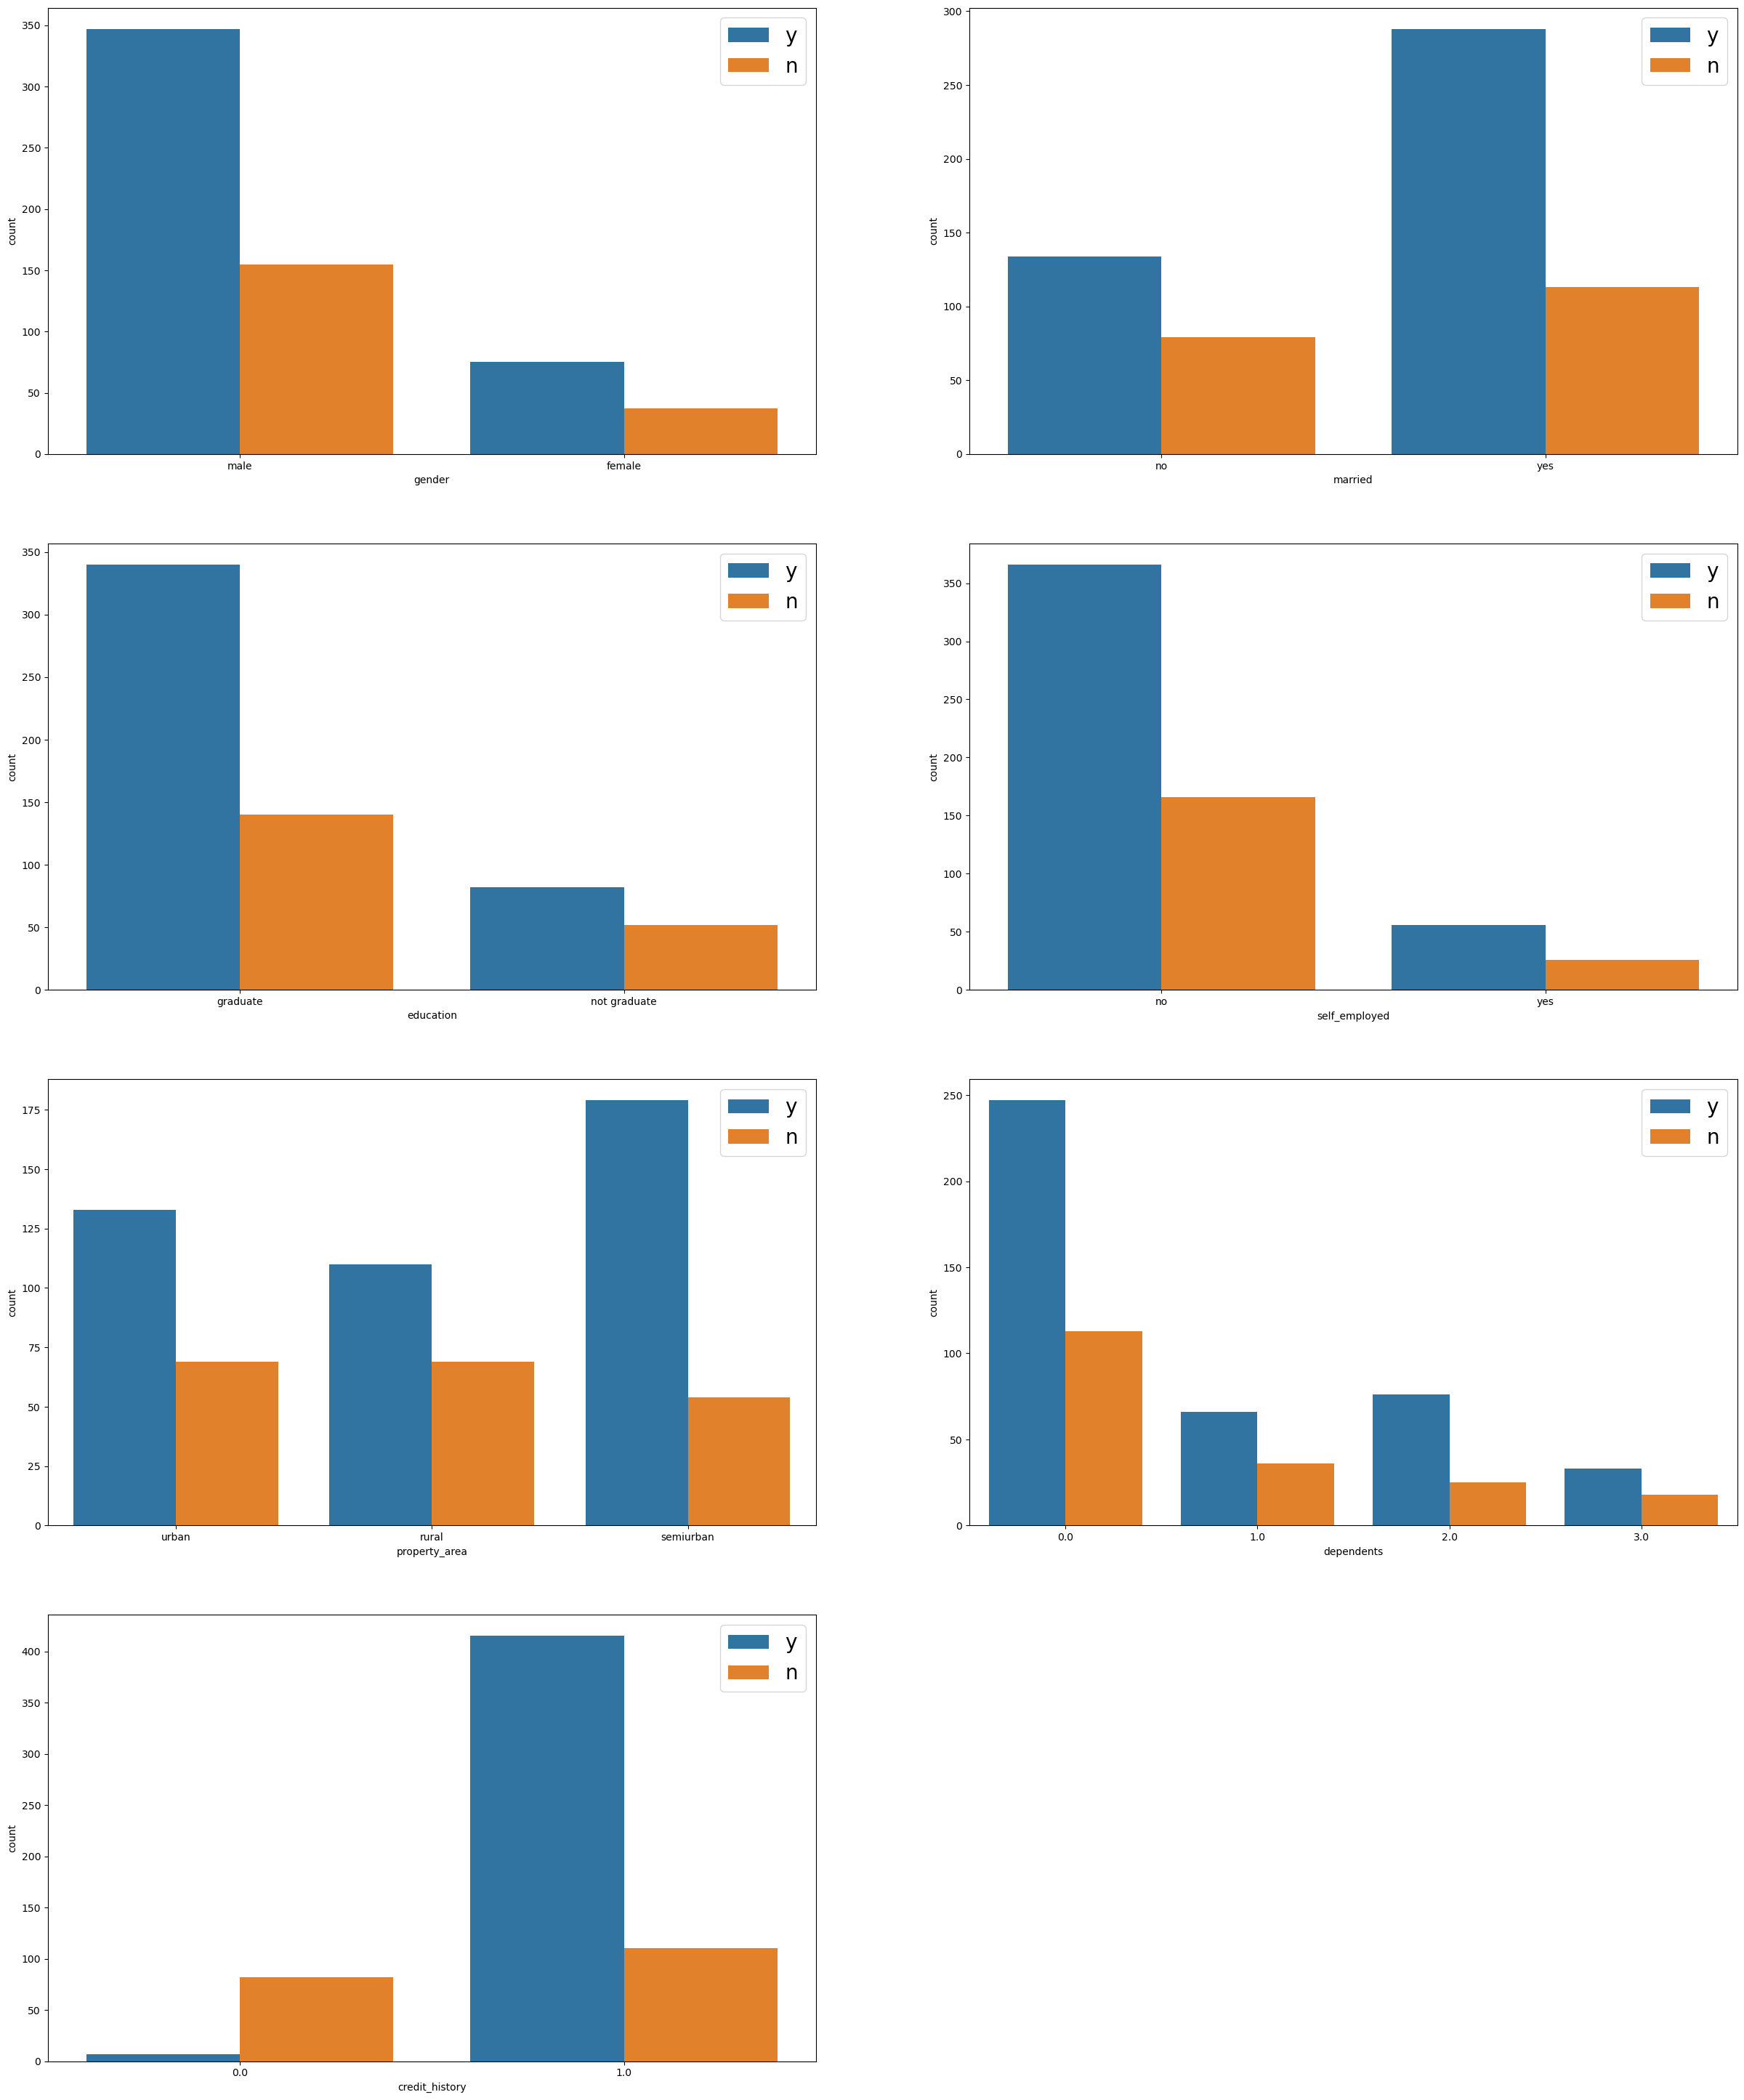

In [11]:
df_cat_obj = df[['gender', 'married', 'education', 'self_employed', 'property_area']].copy()
df_cat_nonobj = df[['dependents', 'credit_history']].copy()
df_cat = pd.concat([df_cat_obj, df_cat_nonobj], axis=1, join='inner')

i = 1
plt.figure(figsize = (30, 75))
for col in df_cat:
    plt.subplot(8,2,i)
    sns.countplot(data = df, x = col, hue = 'loan_status')
    plt.legend(loc="upper right", frameon=True, fontsize=20)
    i += 1

###### From the above visualizations, we can observe the following (inferences limited to current dataset):
- Men have a higher loan approval chance than women.
- Married people have a higher loan eligibility than unmarried people.
- Education plays an importan role in obtaining loans/credits, as graduates have a higher approval than non-graduates.
- Creditors tend to prefer salaried employees for loans, as self-employed people have a lower approval in the above dataset.
- People in rural areas have lower loan eligibility than people in urban areas. People from semi-urban areas have the highest loan approval chance among the three.
- People with lesser number of dependents generally have a higher chace of loan-approval.
- People with a good credit history have a higher loan eligibility than ones with history of credit defaulting.

### 5. Encode the categorical data. (2)

In [12]:
# Encoding the categorical variables
cat = df_cat.columns
df1 = df.copy()

# Initializing Label Encoder
le = LabelEncoder()

for i in cat:
    df1[i]=df1[[i]].apply(le.fit_transform).astype(np.uint8)
    
df1.head(5)

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1,2,y
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,n
2,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,y
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,y
4,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,y


### 6. Separate the target and independent features and split the data into train and test. (2)

In [13]:
## Separating the target and independent features
X = df1.drop('loan_status', axis=1)
y = df1['loan_status']

In [14]:
# splitting dataset into train-test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(429, 11) (185, 11) (429,) (185,)


### 7. Build a classification model to predict the loan eligibility status of the customer and save your model using pickle. (3)

In [15]:
# function 'fitNpredict' takes the model and data as inputs  
def fitNpredict(model, X_train, X_test, y_train, y_test):
    
    # fits the model with the train data 
    model.fit(X_train.values, y_train)
    
    # makes predictions on the test set
    predictions = model.predict(X_test)
    
    # calculates the accuracy score
    score = accuracy_score(y_test, predictions)                 
    
    # returns the accuracy score
    return score   

In [16]:
lr = LogisticRegression()
result = fitNpredict(lr, X_train, X_test, y_train, y_test)

rs = pd.DataFrame()
rs['Logistic Regression'] = pd.Series(result)
rs

,Logistic Regression
0,0.794595


In [17]:
import pickle
#saving model to disk
pickle.dump(lr, open('model.pkl', 'wb'))

### NEXT : Python Flask ML Application development (35 points)